# AI Saturdays ML Sesion 4 (Unsupervised Learning)



What we'll be doing in this notebook:
-----
1. Give a general introduction to unsupervised learning.
1. Use k-means clustering as unsupervised learning technique.
1. Load and explore a dataset.
1. Find clusters with k-means algorithm.
1. Evaluate our results with the Elbow method.
1. Visualize data with PCA.

Unsupervised Learning: Pattern finding in data 🔍
------

Unsupervised Learning is the process of identifying patterns in a dataset. Identifying patterns is often an early step in understanding data. Unsupervised learning methods are a set of techniques designed to _explore_ and find "hidden structure" rather than predict outcomes. 
 
Unsupervised learning does not require labeled data, therefore works for broader range of data. In fact, most data in the world is unlabelled. However, since there are no labels / correct answers there is not always a clear feedback to validate that the results are correct.

We saw two main types of unsupervised learning:

1. **Dimension Reduction**: it aims to find fewer number of features that be used to build a meaningful model. There are many reasons for reducing the number of features in a dataset, from avoiding overfitting to speeding up modeling fitting time. One of the most common dimension reduction techniques is **Principal Component Analysis (PCA).**

1. **Clustering**: it is what it sounds like: chunking your data into sub-groups (clusters) based on similar characteristics. Then these sub-groups are used for later analysis. Clustering is an intuitive to understand the various natural segments that make up the population of your data. Clustering typically makes it easier to visualizes your data. **K-means** one of the most common clustering techniques. The goal of k-means is find a group of datapoints that close to each other (a cluster) and are far away from other datapoints (the other clusters).

Let's start practising!
------

First, let's import the relevant packages to start coding:

In [1]:
# Data loading and manipulation
import pandas as pd
import numpy as np

# K-Means clustering algorithm
from sklearn.cluster import KMeans

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
 
# Places the plots in the Jupyter Notebook
%matplotlib inline

# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Keep everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

Load and explore the data
-----

It is always good idea 💡 to take a peak at the raw data.

In [2]:
df = pd.read_csv('loans.csv')
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


How many rows and colums does the dataset contain?

In [3]:
print(f"There are {df.shape[1]:,} columns in the dataframe.")
print(f"There are {df.shape[0]:,} rows in the dataframe.")

There are 11 columns in the dataframe.
There are 6,019 rows in the dataframe.


Get a general numeric description of the dataset

In [4]:
df.describe()

,id_number,loan_amount,lender_count,funded_amount,repayment_term
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000
mean,1.359770e+06,1499.011464,35.661406,1325.070610,11.803290
std,3.719316e+05,2512.517280,73.420256,2444.726815,9.114948
min,1.377200e+04,50.000000,0.000000,0.000000,3.000000
25%,1.425188e+06,300.000000,7.000000,200.000000,8.000000
50%,1.550673e+06,625.000000,16.000000,525.000000,10.000000
75%,1.566204e+06,1825.000000,41.000000,1525.000000,14.000000
max,1.573593e+06,80000.000000,2665.000000,80000.000000,133.000000


Now that we have our data set up, we can begin partitioning our data into clusters based only a few features. Let's think about how to choose these…

As a potential borrower or lender, what would be interesting to explore? 

In the previous notebooks, we explored a number of interesting ideas, including:

- How much a borrower should ask to borrow
- The time it takes to fund a loan
- What features can influence the loan amount
- If we partition borrowers into distinct groups based on how quickly they can fund a loan, will we be able to learn anything about these groups of borrowers?

The k-means algorithm uses continuous-valued numeric features (k-means  can also be modified to work with categorical and ordinal features).

-----

Let's just pick a couple of interesting continuous numeric features for analysis: *funded_amount & repayment_term*

How are Funded Amount and Days to Fund related?
----

In [5]:
# Keep only the relevant columns
column_1 = 'funded_amount'
column_2 = 'repayment_term'
df = df[[column_1, column_2]]

Let's have a look at the distribution of the *funded_amount* and *repayment_term *

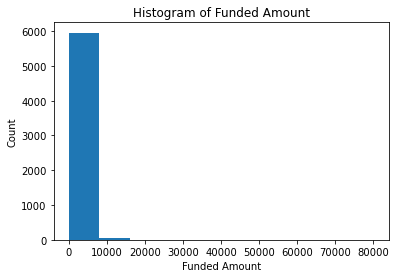

In [6]:
ax = df.funded_amount.hist(grid=False);

ax.set(xlabel='Funded Amount', 
       ylabel='Count', 
       title='Histogram of Funded Amount');  

How can we interpret the number of loans at different funding amounts

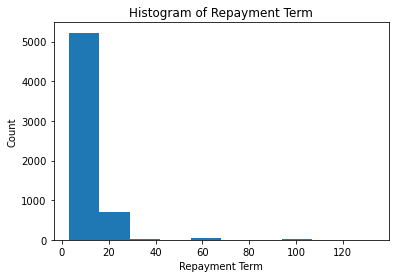

In [7]:
ax = df.repayment_term.hist(grid=False);

ax.set(xlabel='Repayment Term', 
       ylabel='Count', 
       title='Histogram of Repayment Term');  

How can we interpret the number of loans for different amount of times?

Are these clear histograms? Should we do somethign about it? 
<br>.
<br>.
<br>.
<br>.

**YES**

In order to know which values should be set as thresolds, we can have a look at the interqualite range and apply the same logic we used for regression!

In [9]:
q1_funded_amount = np.percentile(df['funded_amount'], q=25)
q3_funded_amount = np.percentile(df['funded_amount'], q=75)

interquartile_range_funded_amount = q3_funded_amount - q1_funded_amount
step_funded_amount = 1.5 * interquartile_range_funded_amount

limit_below_funded_amount = q1_funded_amount - step_funded_amount
limit_above_funded_amount = q3_funded_amount + step_funded_amount

print(limit_below_funded_amount)
print(limit_above_funded_amount)

-1787.5
3512.5


In [10]:
q1_repayment_term = np.percentile(df['repayment_term'], q=25)
q3_repayment_term = np.percentile(df['repayment_term'], q=75)

interquartile_range_repayment_term = q3_repayment_term - q1_repayment_term
step_repayment_term = 1.5 * interquartile_range_repayment_term

limit_below_repayment_term = q1_repayment_term - step_repayment_term
limit_above_repayment_term = q3_repayment_term + step_repayment_term

print(limit_below_repayment_term)
print(limit_above_repayment_term)

-1.0
23.0


In [11]:
# Filter data to remove outliers
funded_small = df.funded_amount < 3512  # Remove large loans
repayment_short = df.repayment_term < 23 # Remove long repayment terms
df_good = df[funded_small & repayment_short]

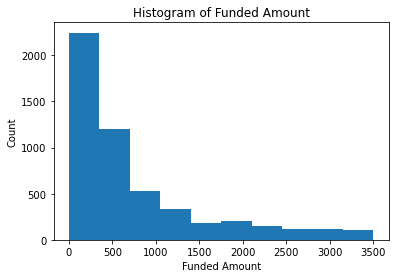

In [12]:
ax = df_good.funded_amount.hist(grid=False);

ax.set(xlabel='Funded Amount', 
       ylabel='Count', 
       title='Histogram of Funded Amount');  

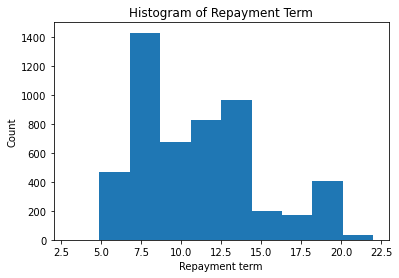

In [15]:
ax = df_good.repayment_term.hist(grid=False);

ax.set(xlabel='Repayment term', 
       ylabel='Count', 
       title='Histogram of Repayment Term');  

These charts look better, don't they?

After having removed outliers from the dataset, it becomes easier to extract conclusions from the data. Let's see how many rows we have removed:

In [13]:
print(f"There are {df_good.shape[1]:,} columns in the new dataframe.")
print(f"There are {df_good.shape[0]:,} rows in the new dataframe.")
print(f"We have reduced the dataframe in {len(df)-len(df_good)} rows")

There are 2 columns in the dataframe.
There are 5,178 rows in the dataframe.
We have reduced the dataframe in 841 rows


How can we interpret the relationship between the funded amount and time to fund? Have a look with a scatter plot!

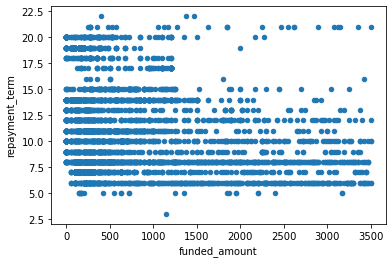

In [17]:
# Plot the relationship between these two variables
df_good.plot.scatter(x=column_1,
                y=column_2);

Clustering
======
How do we do k-means clustering?
-----

Initially, datapoints are <i>randomly assigned</i> to a cluster. Then the center of each cluster is calculated.

Then we alternate between two steps:

1. Assignment step: Observations are assigned to a cluster where the center is closest to them.

2. Update step: New center points of clusters are determined

The process repeats until observations shuffle are long around to different clusters anymore and the center of each cluster no longer moves.

In other words, observations are constantly being reassigned to clusters until the distance between an observation and their closest center point is minimized.

Fitting our data with k-means using scikit-learn
----

Now we're ready to run the k-means algorithm:

Let's take quick peek at the [scikit-learn's documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [29]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 2 or 3
kmeans.fit(df_good);

Now that we have clusters, the best way to understand them is to visualize them. First, add the cluster labels for each data point to the dataframe by creating a new column called *kmeans_label*

In [30]:
df_good['kmeans_labels'] = kmeans.labels_
df_good.head()

<ipython-input-30-76d7bb91f37a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good['kmeans_labels'] = kmeans.labels_


,funded_amount,repayment_term,kmeans_labels
1,975,12,2
2,950,14,2
3,825,14,2
4,725,13,2
5,725,13,2


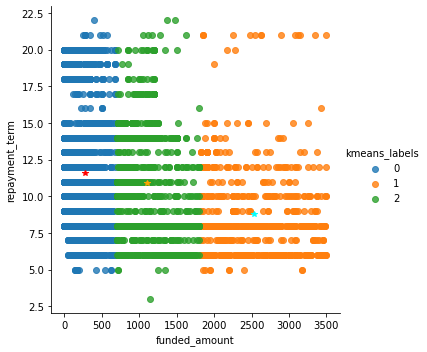

In [31]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                       y=column_2, 
                       data=df_good, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

**Question**:_Why are the means where they are?_  

<br>.
<br>.
<br>.

Choosing the number of clusters
-----

The k-means algorithm is somewhat naive -- it clusters the data into k clusters, even if k is not the right number of clusters to use.

We arbitrarily set the number of clusters to be 2. But **determining the appropriate number of clusters (k) is actually one of the most challenging parts of clustering.**

There is no hard and fast rule for what the value of k should be because the number of clusters will depend on your data and what the goal of your analysis. The number of groups you choose to partition in your data directly influences the results you'll find. In most areas of data analysis, it's attractive to take as granular an approach as possible, but having too many clusters can be counterproductive because the grouping will not tell you much.

_Is it possible to have too many clusters? Or too few clusters?_

Think about these extreme examples: 

1. A single cluster for all your data 
2. A cluster for each data point

Neither of these will tell you anything new about your data! 

Rather, clustering is most effective when observations in the same cluster are very similar to each other. Also, we want observations in different clusters to be as different from each other as possible.

Elbow method to explore number of clusters
------

The elbow method is a simple, intuitive way of exploring how changing the number of clusters impacts the "tightness" of the clusters. 

The elbow method runs k-means clustering on the same dataset for a range of values of k (say, k is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) and for each value of k, calculate the within-cluster sum-of-squares errors (SSE).

SSE is a measure of how coherent clusters are. A lower is SSE is better (an inverted score), it means the each cluster is very similar to itself. SSE is like a golf score or heart-rate, lower is better.

As k increases, the improvement in SSE () will lessen. At some point this lack of improvement will be rapid, creating the "elbow" shape.

One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

![](../images/elbow_method.png)

What the elbow method does is this:

1. Run the k-means algorithm over your dataset for a range of k.
2. For each value of k, calculate how the model fits.
3. If we see an "elbow" in our plotted check, then that marks a good value for k.

In [52]:
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k. The output of this must contain as many k_mean_models as iterations we have run
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(df).score(df) 
              for i, model in enumerate(k_mean_models)] 

In [56]:
k_mean_models

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

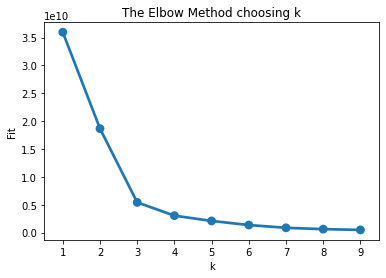

In [55]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit',
       title='The Elbow Method choosing k');

**Questions:**

_How can we interpret the relationship between changing k and the fit of clustering?_  
_Can we see where the "bend" is that looks like an elbow in an arm?_

Visualize with PCA
------
**We used just two features for clustering so this step of visualization with PCA is not actually necessary. However, for the purposes of illustrating PCA's purpose, we will demonstrate how two features can be summarized with one principal component.**

In [60]:
# Separate out the features from the dataframe
x = df[[column_1, column_2]].values #Create the array with all rows!

# Standardize the features. Use  StandardScaler().fit_transform(data) 
x = StandardScaler().fit_transform(x) 

# Get the first principal component (Remember, in this case we only have two and we loook to reduce it to one)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['princpial_component_1'])
data_pca_final = df.join(principalDf)
data_pca_final['funded_amount_standardized'] = pd.Series(data = x[:,0], name = 'funded_amount_standardized')
data_pca_final['repayment_term_standardized'] = pd.Series(data = x[:,1], name = 'repayment_term_standardized')

Let's take a look at how the original dataset looks like together with the principal componenet plus the features standarized

In [63]:
data_pca_final.head()

,funded_amount,repayment_term,kmeans_labels,princpial_component_1,funded_amount_standardized,repayment_term_standardized
0,4825,8,0,1.307466,1.431743,-0.417293
1,975,12,0,-0.116523,-0.143206,0.021583
2,950,14,0,-0.278921,-0.153433,0.241021
3,825,14,0,-0.315079,-0.204568,0.241021
4,725,13,0,-0.266422,-0.245475,0.131302


Understand the relationship between:
- the principal component and funded_amount
- the principal component and repayment_term

Show two scatter plots to illustrate this

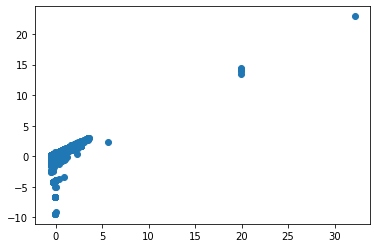

In [66]:
#Understand the relationship between the principal component and funded_amount
plt.scatter(x=x[:,0], y=principalComponents[:,0])

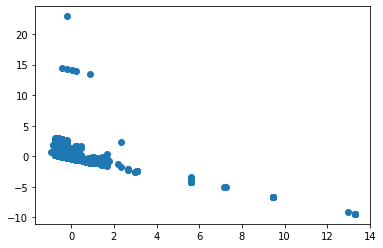

In [67]:
# Understand the relationship between the principal component and repayment_term.
plt.scatter(x=x[:,1], y=principalComponents[:,0])

_What do you notice about the relationship between the component and its two underlying features?_

As an aditional step, let's now re-run the k-means algorithim on the standardized features and see how the relationships look like.

In [72]:
# Re-run k-means on the standardized features
data_pca_final = data_pca_final.loc[data_pca_final[['funded_amount_standardized', 'repayment_term_standardized']].notnull().all(axis = 1)]
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(data_pca_final[['funded_amount_standardized', 'repayment_term_standardized']])
data_pca_final['kmeans_labels'] = kmeans.labels_

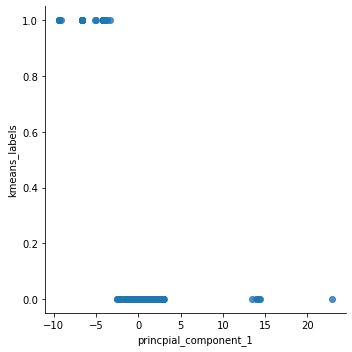

In [76]:
# Plot the principal component against the clusters
kmeans_plot = sns.lmplot(x='princpial_component_1', 
                       y='kmeans_labels', 
                       data=data_pca_final, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       legend=True)

_What do you notice about the relationship with the principal component and the k-means label?_

Summary
------

- We talked about how supervised learning finds patterns in data.
- Clustering is finding groups within a dataset.
- K-means clustering is a popular clustering technique that iteratively finds the best groups and center/means of groups.
- We fit k-means to data and evaluated the results.

Further study
-----

If you want to understand k-means at a deeper level, start at the notebook found [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

If you are interested in a more theory behind k-means, a great resource is [here](https://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf). 

There are many other clustering methods. Another popular method is [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

<br>
<br> 
<br>

----